In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

In [254]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


def scale_columns(df:pd.DataFrame, column_lst:list)->pd.DataFrame:
  """
  Feature engineering by scaling column values

  Args:
      df (pd.DataFrame): _description_
      lst (list): _description_
      column_name:str

  Returns:
      pd.DataFrame: _description_
  """
  
  for col in column_lst:
    df = df.join(pd.get_dummies(df[col])).drop([col], axis =1)
  
  return df

def support_vector_machine(X:pd.DataFrame, y:np.array):
  """_summary_

  Args:
      X (pd.DataFrame): Independent variables
  """
  
  
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
  scaler = MinMaxScaler()

  X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.fit_transform(X_test)
  
  svm_model = SVC()
  svm_model.fit(X_train_scaled, y_train)
  svm_pred = svm_model.predict(X_test_scaled)
  print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
  

def random_tree(X:pd.DataFrame, y:np.array):
  """_summary_

  Args:
      X:pd.Datarame, y:np.Array
  """
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
  scaler = MinMaxScaler()

  X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.fit_transform(X_test)
  
  # Decision Tree
  decision_tree = DecisionTreeClassifier(random_state=42)
  decision_tree.fit(X_train_scaled, y_train)
  dt_pred = decision_tree.predict(X_test_scaled)
  print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

  # Random Forest
  random_forest = RandomForestClassifier(random_state=42)
  random_forest.fit(X_train_scaled, y_train)
  rf_pred = random_forest.predict(X_test)
  print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


In [235]:
df = pd.read_csv("customer.csv")

In [236]:
agent_shifts = df["Agent Shift"].unique()
tenure = df["Tenure Bucket"].unique()
managers = df["Manager"].unique()

In [237]:
connected_handling_time = df.groupby("Manager").sum("CSAT Score").sort_values("connected_handling_time")[::-1]

In [238]:
highest_revenue = df.groupby("Manager").sum("CSAT Score").sort_values("Item_price")[::-1]

<Axes: >

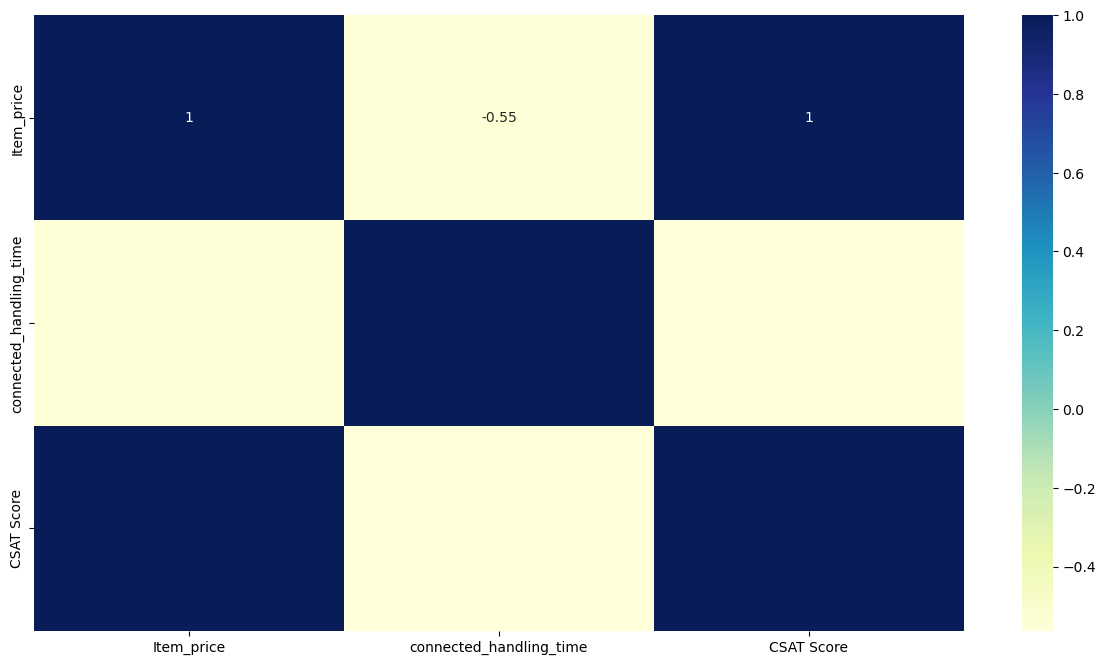

In [239]:
plt.figure(figsize= (15,8))
sns.heatmap(highest_revenue.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Item_price', ylabel='CSAT Score'>

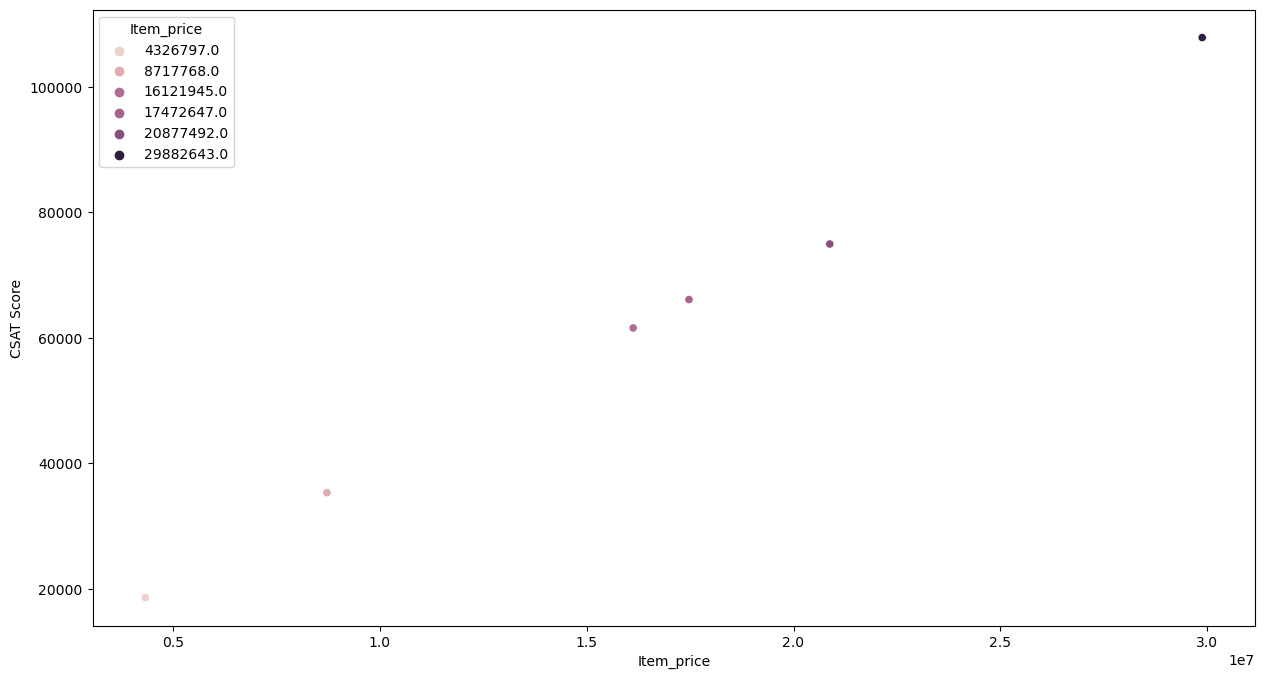

In [240]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Item_price", y ="CSAT Score", data = highest_revenue, hue ="Item_price")

<Axes: xlabel='CSAT Score', ylabel='connected_handling_time'>

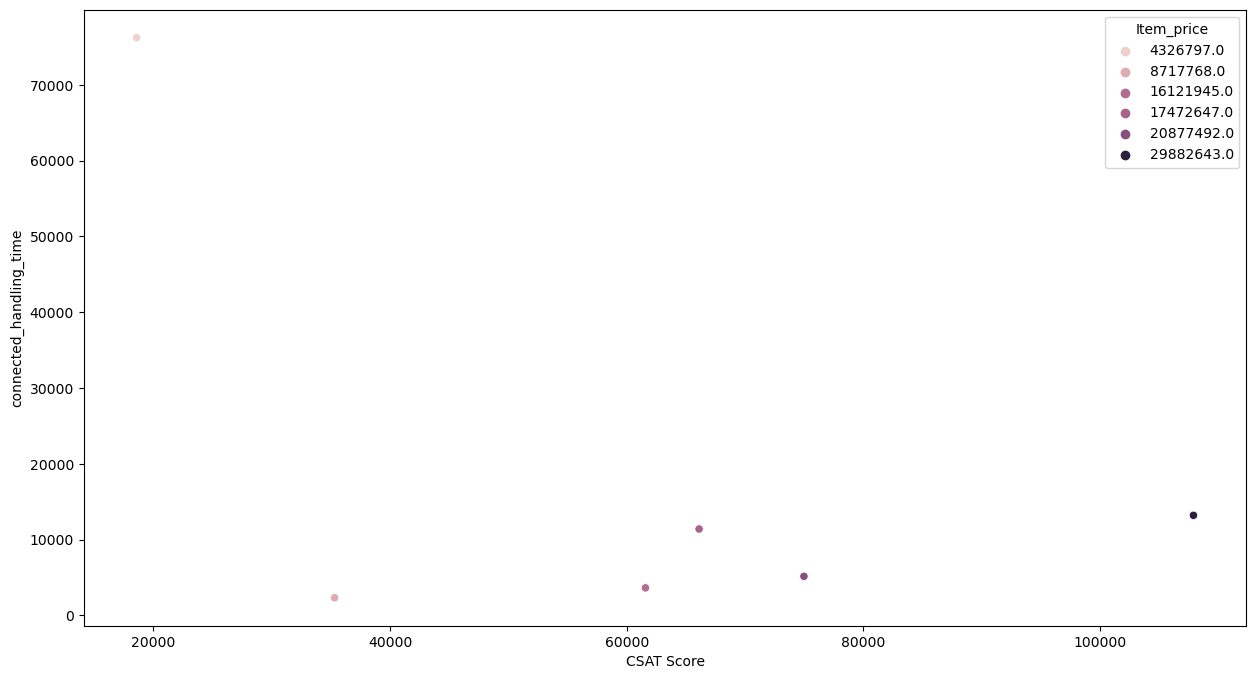

In [241]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="CSAT Score", y ="connected_handling_time", data = highest_revenue, hue ="Item_price")

In [242]:
# tenure_dict = {">90":"Senior", "61-90":"Mid-Senior","31-60":"Mid-Junior","0-30":"Junior","On Job Training": "Intern"}
# df["Tenure Bucket"] = df["Tenure Bucket"].apply(lambda x: tenure_dict[x])


In [243]:
columns_to_keep = ["Manager", "Item_price", "Agent Shift", "CSAT Score", "connected_handling_time"]
df.drop([col for col in df.columns if col not in columns_to_keep], axis=1, inplace=True)

In [245]:
df = scale_columns(df,["Manager", "Agent Shift"])

In [246]:
df.fillna(0, inplace=True)

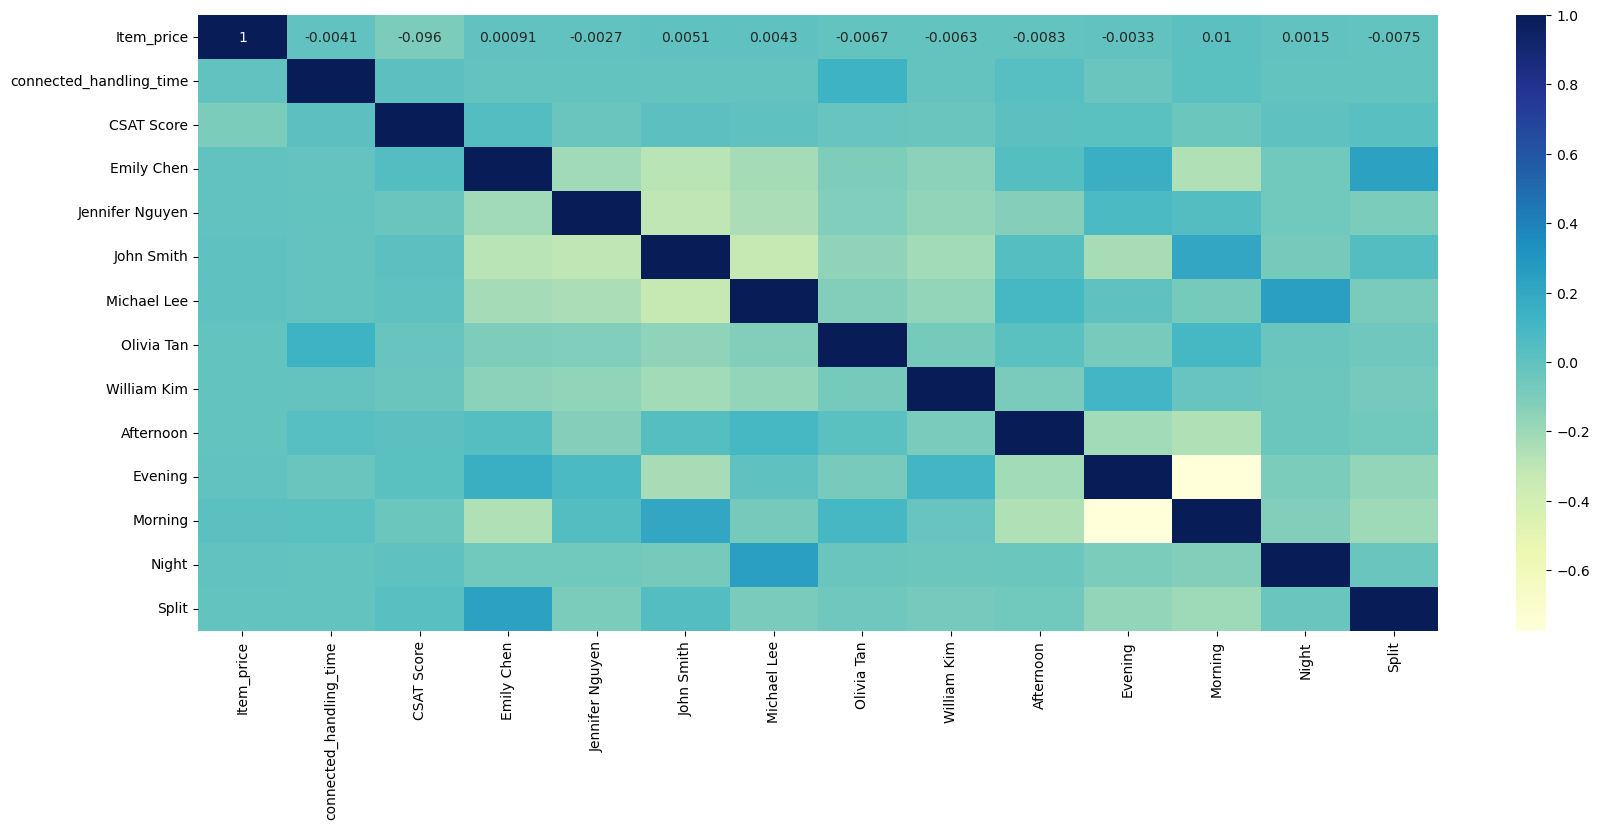

In [247]:
plt.figure(figsize= (20,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [248]:
X,y = df.drop("CSAT Score", axis =1), df["CSAT Score"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

In [249]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [250]:



y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_pred)
  
print(classification_report(y_test,y_pred))

print(f"The Accuracy: {accuracy}")

              precision    recall  f1-score   support

           1       0.36      0.01      0.02      3321
           2       0.00      0.00      0.00       350
           3       0.00      0.00      0.00       790
           4       0.00      0.00      0.00      3409
           5       0.70      1.00      0.82     17903

    accuracy                           0.69     25773
   macro avg       0.21      0.20      0.17     25773
weighted avg       0.53      0.69      0.57     25773

The Accuracy: 0.6944476778023513


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [251]:
support_vector_machine(X, y)

SVM Accuracy: 0.6946416792767625


In [255]:
random_tree(X, y)

Decision Tree Accuracy: 0.658518604741396
Random Forest Accuracy: 0.6413300741085632


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
